# FFT

A gyors Fourier transzformáció (FFT) a diszkrét Fourier transzformáció (DFT) számítására alkalmazott hatékony numerikus eljárás. A DFT az alábbi összefüggés kiszámítását jelenti:

$$F\left(\frac{n}{N}\right) = \sum_{k=0}^{N-1} f(k) e^{-i 2 \pi k \frac{n}{N} }$$

* $F(\frac{n}{N})$ a DFT eredménye $\frac{n}{N}$ ciklus/minta frekvenciára.
* a frekvenciát 0 tól (minták száma/2)-ig használjuk fel

## sin(t) függvény mintavételezése

Hullám alakunk:

* frekvencia: 1 Hz
* amplitúdó: 5

Mintavételezzük:

* 3 másodperc időtartam
* összesen 30 minta

In [3]:
from __future__ import unicode_literals
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# segédfüggvény a rajzoláshoz:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


In [11]:
tmax = 3.0  # teljes idő
num_s = 30 # minták száma
mps = (num_s-1)/tmax # minta/másodperc
print "%.5f minta/másodperc (Hz)" % mps

t = np.linspace(0, tmax, num_s)

# x = 0 és x = 1 között egy teljes periódus (2 pi) van, tehát ez egy 1 Hz -es jel 5 amplitúdóval
f_hz = 1.0
ampl = 5
f = lambda x: ampl * np.sin(f_hz * 2*np.pi*x)
    
s_f = [f(i) for i in t]  # mintavételezett f

9.66667 minta/másodperc (Hz)


<Container object of 3 artists>

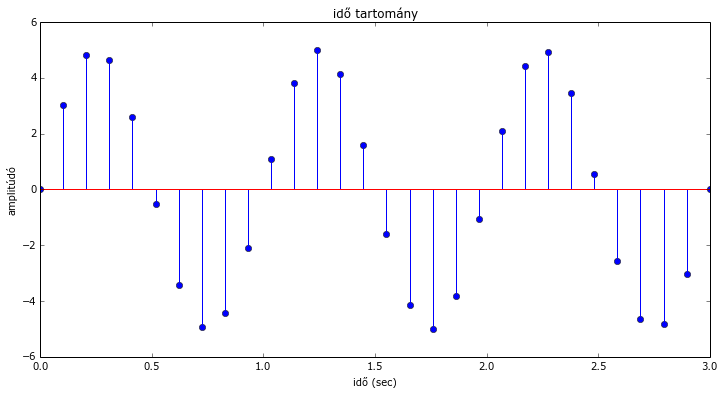

In [12]:
setup_graph(title='idő tartomány', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
#print t, s_f
plt.stem(t, s_f)

## FFT számítása

A számítást a NumPy eljárása segítségével végezzük. Ez az eljárás a következő transzformációt számítja ki:
$$ y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{k n}{N} } x[n] \, $$

In [13]:
fft_f = np.fft.fft(s_f)

Felrajzoljuk a transzformált valós és képzetes részét (spektrum):

<Container object of 3 artists>

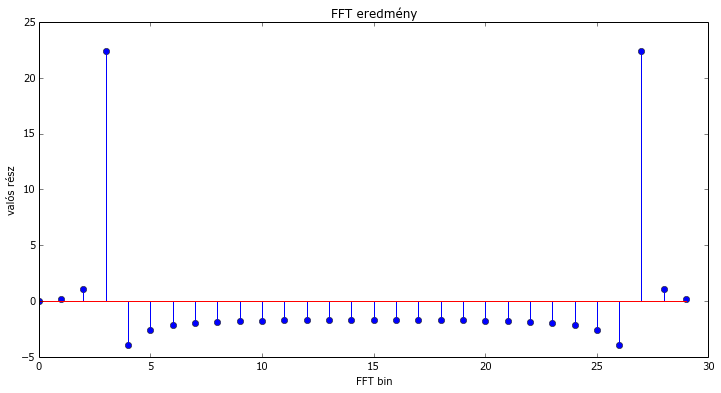

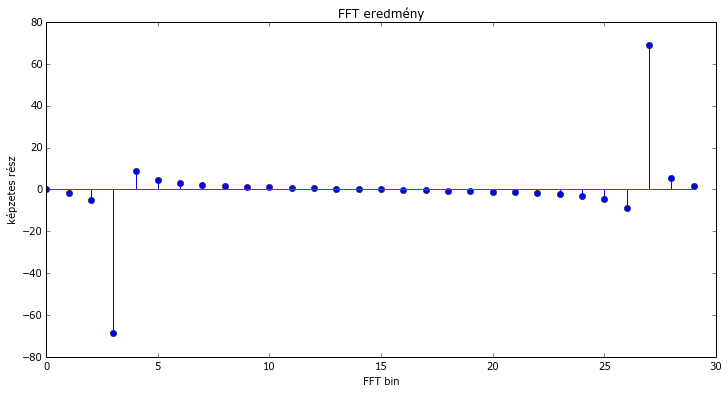

In [14]:
x= np.r_[0:30:1]
plt.figure()
setup_graph(title='FFT eredmény', x_label='FFT bin', y_label='valós rész', fig_size=(12,6))
plt.stem(x,fft_f.real)
plt.figure()
setup_graph(title='FFT eredmény', x_label='FFT bin', y_label='képzetes rész', fig_size=(12,6))
plt.stem(x,np.imag(fft_f),'b-')


### Miért szimmetrikus?

Azért, mert valós $f(t)$ függvény (bemenő jel) esetén a transzformált második fele mindig az első tükörképe lesz. 

A kiszámított értékek a következő sorrendet követik: Ha `A = fft(a, n)`, akkor `A[0]` tartalmazza a zérus frekvenciájú összetevőt (a jel átlagát), ami mindig valós értékű valós jel esetén. `A[1:n/2]` tartalmazza a pozitív frekvenciájú tagokat, és `A[n/2+1:]` a negatív frekvenciájúakat, a csökkenő negatív frekvenciákra. Páros számú adat esetében `A[n/2]` tartalmazza mind a pozitív, mind a negatív Nyquist frekvenciájú tagot, ami mindig valós értékű valós bemenő jel esetén. Páratlan számú adat esetében `A[(n-1)/2]`-ben van a legnagyobb pozitív frekvenciájú tag, és `A[(n+1)/2]`-ben a legnagyobb negatív frekvenciájú tag. Az `np.fft.fftshift(A)` függvény eltolja a transzformált eredmény vektort olymódon, hogy a zérus frekvenciát középre helyezi el, illetve `np.fft.ifftshift(A)` végzi el ennek fordítottját.

Általában mindig valós függvényekkel dolgozunk, ezért használhatjuk a transzformáció valós változatát: `np.fft.rfft()`

<Container object of 3 artists>

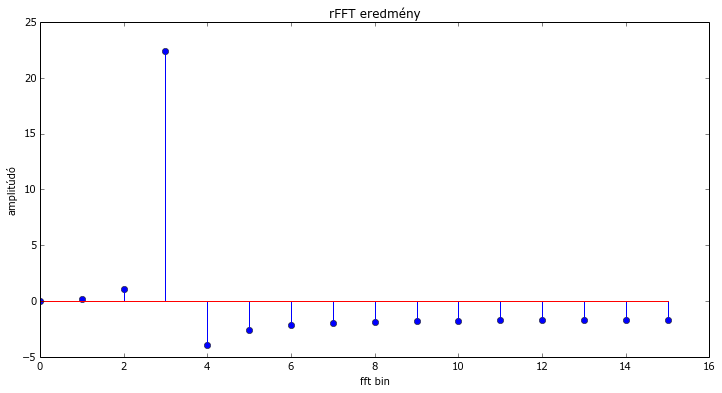

In [15]:
rfft_f = np.fft.rfft(s_f)
setup_graph(title='rFFT eredmény', x_label='fft bin', y_label='amplitúdó', fig_size=(12,6))
plt.stem(rfft_f)

### A frekvencia tengely átskálázása

Az fft bin helyett a vízszintes tengelyt frekvencia egységben skálázzuk.


In [16]:
rf = [(i*1.0/num_s)*mps for i in range(num_s/2+1)]
# látszik, hogy a frekvencia 0-tól 4.8333 Hz-ig változik, ami a Nyquist frekvencia (mintavételezési frekvencia fele)
rf

[0.0,
 0.3222222222222222,
 0.6444444444444444,
 0.9666666666666667,
 1.2888888888888888,
 1.611111111111111,
 1.9333333333333333,
 2.2555555555555555,
 2.5777777777777775,
 2.9,
 3.222222222222222,
 3.544444444444444,
 3.8666666666666667,
 4.188888888888889,
 4.511111111111111,
 4.833333333333333]

<Container object of 3 artists>

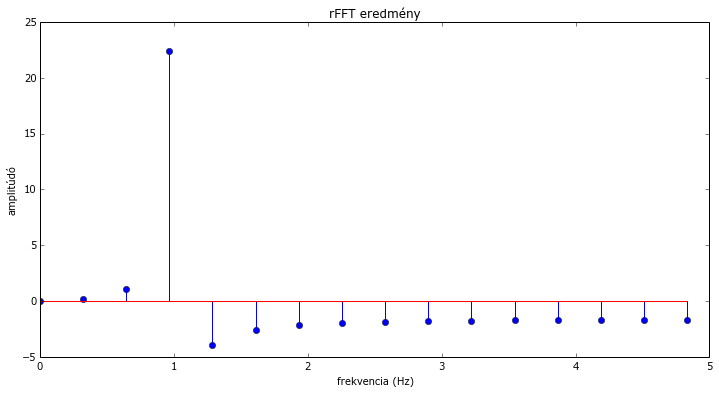

In [17]:
setup_graph(title='rFFT eredmény', x_label='frekvencia (Hz)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(rf, rfft_f)

### Az értékek skálázása

Negatív értékeink is vannak, és az amplitúdó nem 5.

Az összetevők nagysága (magnitúdó):

$$mag(i) = \frac{\sqrt{\Re(i)^2 + \Im(i)^2}}{N}$$

Az `A` transzformált magnitúdúját az `np.abs(A)`-val is kiszámíthatjuk.

<Container object of 3 artists>

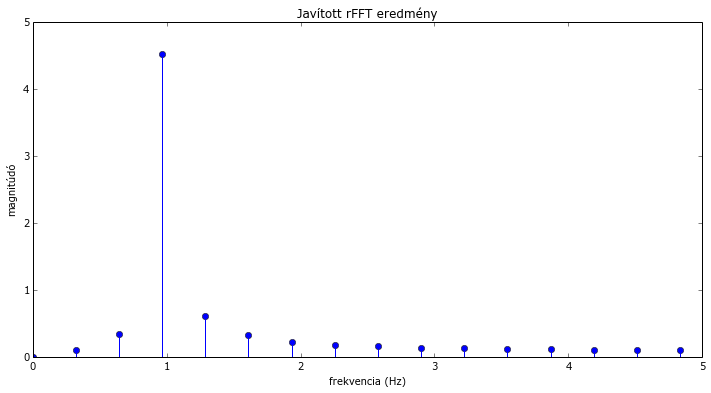

In [18]:
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(rfft_f) for i in rfft_f]

setup_graph(title='Javított rFFT eredmény', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.stem(rf, rfft_mag)

A transzformált komplex `A` mennyiség fázisszögét az `np.angle(A)` függvénnyel számíthatjuk ki:

<Container object of 3 artists>

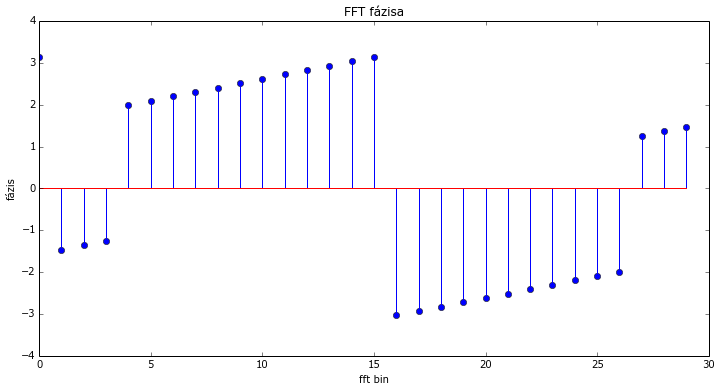

In [20]:
fft_phase = np.angle(fft_f)
setup_graph(title='FFT fázisa', x_label='fft bin', y_label='fázis', fig_size=(12,6))
plt.stem(x, fft_phase)

### Miért nem kaptuk vissza pontosan az 1 Hz-es szinusz jelet?

* Nem lenne pontos az FFT? - Számoljuk ki az inverzet és vessük össze az eredetivel!

## Inverz FFT

A kiszámított FFT eredményből inverz FFT-vel visszakaphatjuk az eredeti hullámot (az inverz valós FFT-vel - `irfft`).

Az inverz transzformáció számítása az alábbi összefüggés szerint történik:
$$x[n] = \frac{1}{N} \sum_{n=0}^{N-1} e^{2 \pi j \frac{k n}{N} } y[k] \, .$$

<Container object of 3 artists>

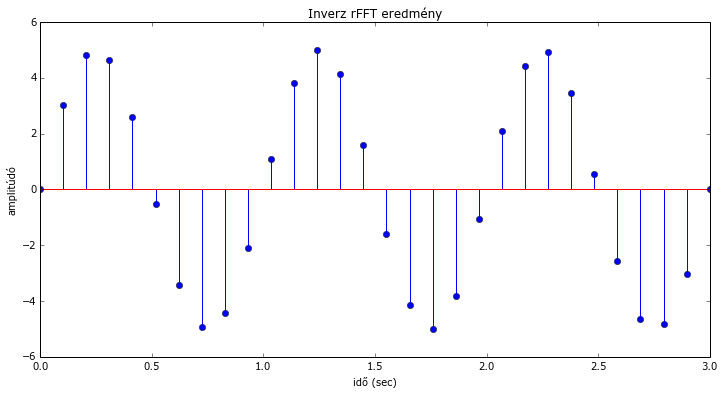

In [21]:
irfft_f = np.fft.irfft(rfft_f)

setup_graph(title='Inverz rFFT eredmény', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(t, irfft_f)

Van-e különbség az eredeti és visszatranszformált értékek között?

<Container object of 3 artists>

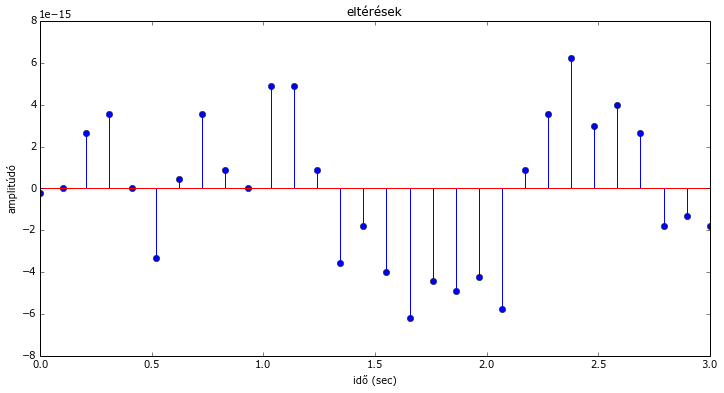

In [22]:
setup_graph(title='eltérések', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(t, irfft_f-s_f)

A kerekítési eltérésektől eltekintve visszakaptuk az eredeti szinuszjelet - tehát nem az FFT az oka az eltéréseknek.

### Bázisfüggvények frekvenciája

Mivel a felbontandó jel frekvenciája (1Hz) nem felel meg egyetlen bázisfüggvény (szinusz, koszinusz) frekvenciájának sem (ezek 0.32222222 Hz értékközzel növekszenek), ezért a jel amplitúdója az 1 Hz-hez közeli bázisfüggvények amplitúdóiban jelenik meg.

Nézzük mi történik, ha a jel frekvenciája a mintavételezési frekvenciának pontos többszöröse:

10.00000 minta/másodperc (Hz)


<Container object of 3 artists>

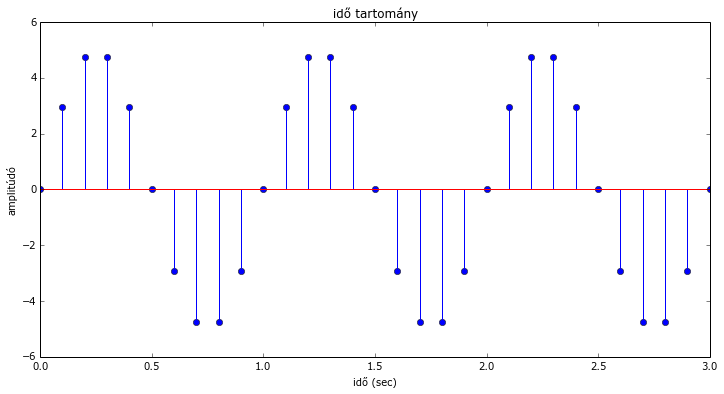

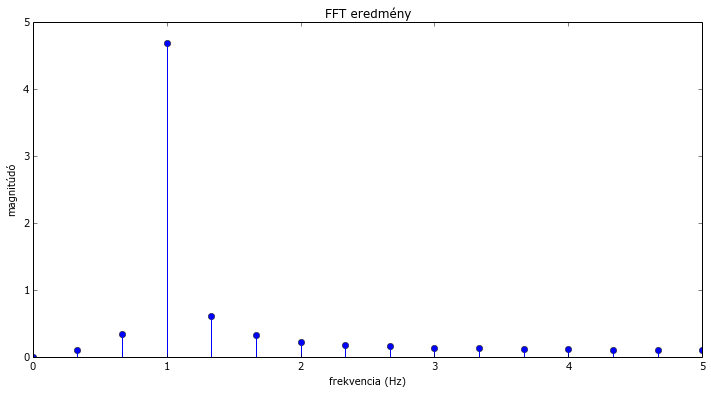

In [27]:
num_s = 31 # minták száma
mps = (num_s-1)/tmax # minta/másodperc
print "%.5f minta/másodperc (Hz)" % mps

t = np.linspace(0, tmax, num_s)
f = lambda x: ampl * np.sin(f_hz * 2*np.pi*x)
s_f = [f(i) for i in t]  # új mintavételezett f
setup_graph(title='idő tartomány', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(t, s_f)

# valós FFT számítása
rfft_f = np.fft.rfft(s_f)
rf = [(i*1.0/(num_s-1))*mps for i in range(num_s/2+1)]
rfft_mag = np.abs(rfft_f)/len(rfft_f)

setup_graph(title='FFT eredmény', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.stem(rf, rfft_mag)

Még mindig nem pontos az eredmény: ennek az az oka, hogy az utolsó minta értéket nem szabad szerepeltetni. Javítsuk ki:

<Container object of 3 artists>

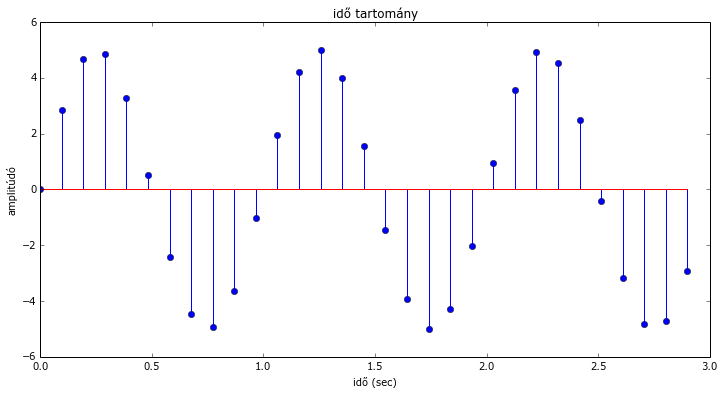

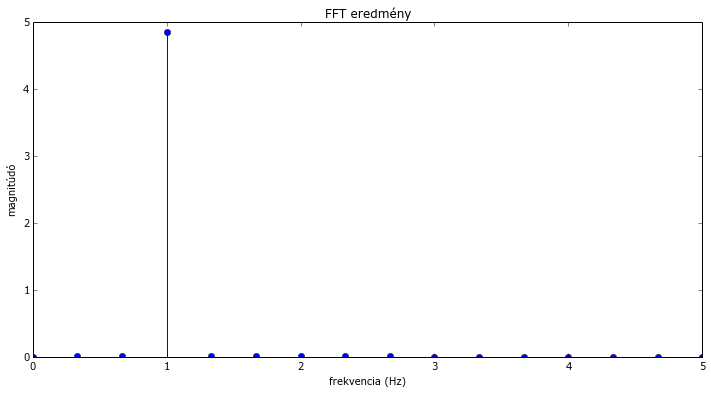

In [28]:
t = np.linspace(0, tmax-1.0/mps, num_s)
f = lambda x: ampl * np.sin(f_hz * 2*np.pi*x)
s_f = [f(i) for i in t]  # új mintavételezett f
setup_graph(title='idő tartomány', x_label='idő (sec)', y_label='amplitúdó', fig_size=(12,6))
plt.stem(t, s_f)

# valós FFT számítása
rfft_f = np.fft.rfft(s_f)
rf = [(i*1.0/(num_s-1))*mps for i in range(num_s/2+1)]
rfft_mag = np.abs(rfft_f)/len(rfft_f)

setup_graph(title='FFT eredmény', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.stem(rf, rfft_mag)


Most már majdnem jó, csak egy baj van: nem pontosan 5 a jel 1Hz-es összetevőjének a nagysága. Miért? Rajzoljuk fel az eredményt féllogaritmikus skálán:

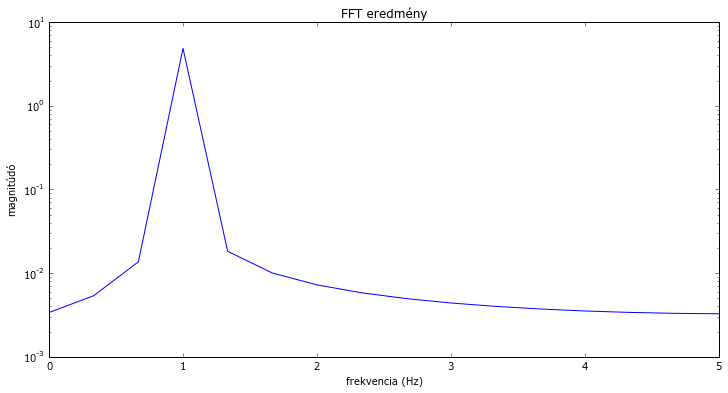

In [29]:
setup_graph(title='FFT eredmény', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.semilogy(rf, rfft_mag)

Az eredményünk azt mutatja, hogy némi jel energia átvándorolt, "átszivárgott" a hozzá közel eső frekvenciákra. Ez a "spectral leakage", és az az oka, hogy egy véges hosszúságú jel nem lehet pontosan meghatározott frekvenciájú.

* a véges hossz annak az eljárásnak felel meg, hogy a végtelen hosszú, 1 Hz-es szinuszjelből kivágunk egy meghatározott darabot
* ez úgy valósítható meg, hogy egy téglalap alakú, 1 amplitúdójú levágó ablakkal (taper) beszorozzuk a jelet
* eredmény: a négyszögablak spektrumával vett konvolúció

A hatás csökkenthető a téglalap ablaknál simább levágás alkalmazásával. Ezt mutatjuk be a következőkben.

## Simitó levágás alkalmazása

Alkalmazzuk a Blackman-féle ablakot:

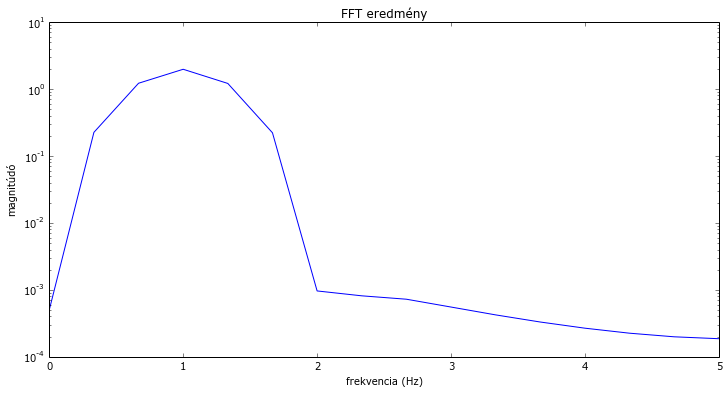

In [34]:
from scipy.signal import blackman
N = len(s_f)
w = blackman(N)
ywf = np.fft.rfft(s_f*w)
ywf_mag = np.abs(ywf)/len(ywf)

setup_graph(title='FFT eredmény', x_label='frekvencia (Hz)', y_label='magnitúdó', fig_size=(12,6))
plt.semilogy(rf, ywf_mag)

Valamit valamiért: Látszik hogy 2 Hz-nél magasabb frekvenciákra a magnitúdó $10^{-3}$ érték alá csökkent, de ennek ára az 1 Hz-es frekvencia csúcs kiszélesedése. Egyébként a Blackman ablak és transzformáltja így néz ki:

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


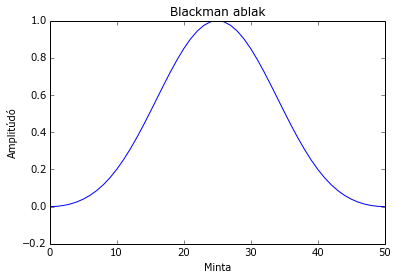

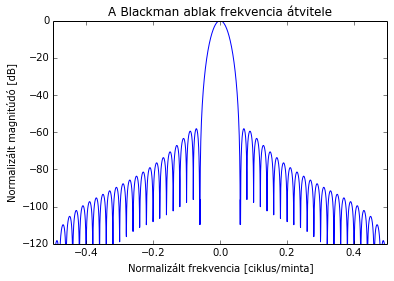

In [35]:
from scipy import signal
from scipy.fftpack import fft, fftshift

window = signal.blackman(51)
plt.plot(window)
plt.title("Blackman ablak")
plt.ylabel("Amplitúdó")
plt.xlabel("Minta")

plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("A Blackman ablak frekvencia átvitele")
plt.ylabel("Normalizált magnitúdó [dB]")
plt.xlabel("Normalizált frekvencia [ciklus/minta]")

## Mintavételezés, átlapolódás

Nézzük meg két, 50 és 150 Hz-es szinuszjel spektrumát:

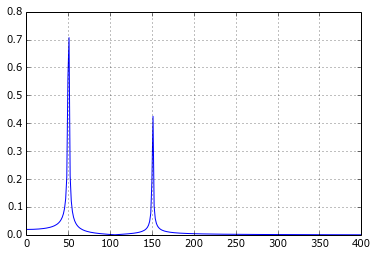

In [5]:
from scipy.fftpack import fft
import numpy as np
# Minták száma
N = 600
# mintavételi intervallum
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(150.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

Mi lesz, ha a mintavételezési frekvencia nincs 300 Hz, ami a mintában előforduló frekvencia kétszerese?

Nézzük meg ismét:

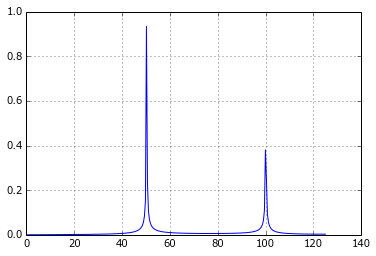

In [7]:
# mintavételi intervallum
T = 1.0 / 250.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(150.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

A 150 Hz-es frekvencia átlapolódott a 100 Hz-es hamis alacsony frekvenciára!